# Hist 3368 - Week 6 - Controlled Vocabulary Over Time

In this notebook, we're going to use Wordnet and groupby() to study which crimes Congress talked about from 1967 to 2010.    

### Load the data

In [48]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob
import nltk
from nltk.corpus import wordnet as wn

In [49]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


***Give this several minutes; we're reading in big data:***

In [50]:
congress = pd.read_csv("congress1967-2010.csv")
#congress = pd.read_csv("eighties_data.csv")

In [51]:
cd ~/digital-history

/users/jguldi/digital-history


In week 4, we saved the output of a wordnet exercise as crime_vocab.csv in your digital-history folder.  Make sure it's there.

***Getting an error?*** If you're missing it you might need to re-run an earlier notebook.

In [52]:
vocab = pd.read_csv("crime_vocab.csv").drop(['Unnamed: 0'], 1)
vocab = list(vocab['word'])

TROUBLESHOOTING: if the line above doesn't work, you might have missed something earlier this week. If you didn't generate crime_vocab.csv, please look back to the session on Wordnet.

In [53]:
vocab[:10]

['crime',
 'offense',
 'criminal offense',
 'criminal offence',
 'offence',
 'law breaking',
 'attack',
 'attempt',
 'aggravated assault',
 'battery']

In [54]:
crimespeakers = ['Mr. BIDEN', 'Mr. HATCH', 'Mr. LEAHY', 'Mr. KENNEDY', 'Mr. PROXMIRE',
       'Mr. THURMOND', 'Mr. SPECTER', 'Mr. SMITH', 'Mrs. FEINSTEIN',
       'Mr. McCLELLAN']

#### Downsample the data to just the top speakers about crime.

In [55]:
congress = congress.drop(['date', 'word_count', "Unnamed: 0", "Unnamed: 0.1"], 1)

congress = congress[congress['speaker'].isin(crimespeakers)]

congress.head()

,speech,speaker,year,month,month_year
887,Mr. President. today. I introduce for myself a...,Mr. PROXMIRE,1967,1,1967-01-01
890,I am happy to yield to the Senator from Alaska.,Mr. PROXMIRE,1967,1,1967-01-01
892,I thank the distinguished Senator from Alaska....,Mr. PROXMIRE,1967,1,1967-01-01
894,I yield.,Mr. PROXMIRE,1967,1,1967-01-01
896,The Senator from Oregon is already a cosponsor...,Mr. PROXMIRE,1967,1,1967-01-01


## Cleaning the data
#### Splitting and stripping punctuation

To clean our text when our text is in tabular form, we can apply many commands that are familiar.  Technically, they are being applied over each row of the pandas dataframe.  But the pandas software makes it easier for us.

For each speech, we will perform some familiar tasks:

  * We will **.split()** the speech into words
  * we will use **.replace(a, '')** to get rid of punctuation
  * we will use **.lower()** to lowercase

The only problem with tabular data is that we have to run splitting, clearing punctuation, stopwording, and other actions on entire **columns** of lists of data rather than just lists.

In theory, you might imagine writing a loop like this to deal with each cell at a time.   However, that would take FOREVER.  

A more efficient approach is to work with the built-in commands that Pandas takes which work over all the cells in an entire column.



The pandas-native commands for working on columns in tabular data have familiar names:

    .str.replace()
    .str.lower()
    .str.split()
    
Let's see them in action.

Get rid of punctuation

In [56]:
congress['speech'] = congress['speech'].str.replace('[^\w\s]','')

Lowercase the text

In [57]:
congress['speech'] = congress['speech'].str.lower()

Split each speech into a list of individual words

In [58]:
congress['speech'] = congress['speech'].str.split()

In [59]:
congress.head()

,speech,speaker,year,month,month_year
887,"[mr, president, today, i, introduce, for, myse...",Mr. PROXMIRE,1967,1,1967-01-01
890,"[i, am, happy, to, yield, to, the, senator, fr...",Mr. PROXMIRE,1967,1,1967-01-01
892,"[i, thank, the, distinguished, senator, from, ...",Mr. PROXMIRE,1967,1,1967-01-01
894,"[i, yield]",Mr. PROXMIRE,1967,1,1967-01-01
896,"[the, senator, from, oregon, is, already, a, c...",Mr. PROXMIRE,1967,1,1967-01-01


#### Lemmatizing with Pandas

Not every command has a native Pandas approach. 

With some commands -- for instance our lemmatizer -- we need to tell Pandas to apply the command over each cell in the column.

We will use 'list comprehension' -- a compressed for-loop -- to tell Pandas to apply our lemmatizer -- wn.morphy() -- to each row in the column 'speech.'

In [60]:
congress['lemmas'] = [[wn.morphy(word) for word in row] for row in congress['speech']] # go through each word of each row of the column 'speech', lemmatizing each 

***Note: this is still very slow. wn.morphy() is a very slow command. Go have lunch and the data will be ready when you return.***

The process of lemmatization with wn.morphy() tends to generate some "None"-type answers for the lemma search, which will cause us trouble later if we don't remove them.

Here is a line of code that tells the computer go through each word of each row of the column 'speech' -- keep anything that isn't 'None' type.

In [61]:
congress['lemmas'] = [[word for word in row if word is not None] for row in congress['lemmas']] # for each word of each row in 'lemmas', keep anything that isn't 'None' type.
congress.head()

,speech,speaker,year,month,month_year,lemmas
887,"[mr, president, today, i, introduce, for, myse...",Mr. PROXMIRE,1967,1,1967-01-01,"[mr, president, today, i, introduce, senator, ..."
890,"[i, am, happy, to, yield, to, the, senator, fr...",Mr. PROXMIRE,1967,1,1967-01-01,"[i, am, happy, yield, senator, alaska]"
892,"[i, thank, the, distinguished, senator, from, ...",Mr. PROXMIRE,1967,1,1967-01-01,"[i, thank, distinguish, senator, alaska, i, am..."
894,"[i, yield]",Mr. PROXMIRE,1967,1,1967-01-01,"[i, yield]"
896,"[the, senator, from, oregon, is, already, a, c...",Mr. PROXMIRE,1967,1,1967-01-01,"[senator, oregon, be, already, a, cosponsor, b..."


Now, because lemmatization was so time-consuming, let's save our work for later.

In [51]:
cd ~/digital-history

/users/jguldi/digital-history


In [62]:
congress.to_csv("congress-1967-2010-crimespeakers-lemmatized.csv")

## Finding a controlled vocabulary in tabular data -- looking for individual words.

We can use list comprehension again to search for the controlled vocabulary.

Notice the use of 
    
    .isin()

to filter for just those words from the Congress speeches that are also to be found in the list *vocab*.

As usual, we are playing a few tricks to make the code more efficient.  Notice the use of 

    set()
    
-- which tells Python to treat the list of controlled vocabulary in *vocab* as a list with a set number of positions. This will make the code run more efficiently.

In [65]:
congress['vocab'] = [[word for word in row if word in set(vocab)] for row in congress['lemmas']] 
congress.head()

,speech,speaker,year,month,month_year,lemmas,vocab
887,"[mr, president, today, i, introduce, for, myse...",Mr. PROXMIRE,1967,1,1967-01-01,"[mr, president, today, i, introduce, senator, ...",[]
890,"[i, am, happy, to, yield, to, the, senator, fr...",Mr. PROXMIRE,1967,1,1967-01-01,"[i, am, happy, yield, senator, alaska]",[]
892,"[i, thank, the, distinguished, senator, from, ...",Mr. PROXMIRE,1967,1,1967-01-01,"[i, thank, distinguish, senator, alaska, i, am...",[tribute]
894,"[i, yield]",Mr. PROXMIRE,1967,1,1967-01-01,"[i, yield]",[]
896,"[the, senator, from, oregon, is, already, a, c...",Mr. PROXMIRE,1967,1,1967-01-01,"[senator, oregon, be, already, a, cosponsor, b...",[]


This will be successful at finding all one-word results -- "murder," "assassination," etc.  But what about "assault and battery" and other 2 or 3-word phrases? 

For our search to work on all relevant phrases, we want to glue the list of words in the column 'lemmas' back together.

We have not removed stopwords, which is important for finding the 'and' in 'assault and battery.'

Once we've glued the lemmas back into strings, we can search for our controlled vocabulary using the pandas command

    .findall()
    
-- which will retain all instances of words and phrases listed in our list *vocab*.  

***Takeaway***: We'll use .findall() rather than the list comprehension code above, because .findall() will find *all* the phrases, not just single words.

#### Glue the lemmas back into strings

Glue the words back together into a string using **.str.join()** 

In [69]:
newcolumn = [] 
for row in congress['lemmas']:
        row = ' '.join(row)
        newcolumn.append(row)
congress['lemmas'] = newcolumn

In [70]:
congress.head()

,speech,speaker,year,month,month_year,lemmas,vocab
887,"[mr, president, today, i, introduce, for, myse...",Mr. PROXMIRE,1967,1,1967-01-01,mr president today i introduce senator morse y...,NaN
890,"[i, am, happy, to, yield, to, the, senator, fr...",Mr. PROXMIRE,1967,1,1967-01-01,i am happy yield senator alaska,NaN
892,"[i, thank, the, distinguished, senator, from, ...",Mr. PROXMIRE,1967,1,1967-01-01,i thank distinguish senator alaska i am deligh...,NaN
894,"[i, yield]",Mr. PROXMIRE,1967,1,1967-01-01,i yield,NaN
896,"[the, senator, from, oregon, is, already, a, c...",Mr. PROXMIRE,1967,1,1967-01-01,senator oregon be already a cosponsor bill sen...,NaN


### Finding a controlled vocabulary (including n-grams) with str.findall()

Next, we'll meet the 

    str.findall() 
    
command, which will search for a pattern over all the strings in a column.

In an earlier lesson, we saw the use of .count() to find instances of an *individual* string such as 'pineapple' or 'democracy.'

In contrast with .count(), str.findall() will search for an entire list of strings -- for all the phrases stored in the list 'vocab.'  We just have to store phrases in 'vocab' properly, formatted as a list of regular expressions. 

#### Formatting the controlled vocabulary with regex

In an earlier lesson we learned about using re.compile and special characters like \\\b to perform accurate searches.  

In this lesson, we'll use the **re** package again to format our vocab list so that Python can efficiently search for instances of full words. The full formula is here:

    r"(?=\b("+'|'.join(vocab)+r")\b)" 
    
You won't be asked to be responsible for regex code, which is its own specialty, but you should notice that "|" means "or," and that we are using .join() to assemble a string of possible searches from each item in the list *vocab*, which we prepared above.  You've seen \\\b before to tell Python to search for the beginning or end of a string.

In [68]:
import re 
vocabpattern = r"(?=\b("+'|'.join(vocab)+r")\b)"  

In [69]:
vocabpattern

'(?=\\b(crime|offense|criminal offense|criminal offence|offence|law breaking|attack|attempt|aggravated assault|battery|assault and battery|resisting arrest|mugging|barratry|capital offense|cybercrime|felony|commercial bribery|housebreaking|break in|breaking and entering|home invasion|abduction|kidnapping|snatch|blackmail|protection|tribute|shakedown|biopiracy|breach of trust with fraudulent intent|embezzlement|peculation|defalcation|misapplication|misappropriation|plunderage|raid|grand larceny|grand theft|petit larceny|petty larceny|petty|pilferage|robbery|armed robbery|heist|holdup|stickup|caper|job|dacoity|dakoity|rip off|highjacking|hijacking|piracy|buccaneering|highway robbery|rolling|rustling|shoplifting|shrinkage|skimming|forgery|fraud|fraud in law|bunco|bunco game|bunko|bunko game|con|confidence trick|confidence game|con game|gyp|hustle|sting|flimflam|sting operation|holdout|pyramiding|scam|cozenage|shell game|thimblerig|swiz|Had crime|hijack|highjack|mayhem|misdemeanor|misdemea

#### Using Regex and str.findall() together to identify the controlled vocabulary

Next we'll use the python function

    .findall() 
    
to find the words in the pandas column and 'extract' just the vocabulary into a new column.

***Note that this may take a while.***

In [70]:
congress["vocab"] = congress["lemmas"].str.findall(vocabpattern)
congress.head()

,Unnamed: 0.1,speech,speaker,word_count,year,month_year,lemmas,vocab
887,887,"[mr, president, today, i, introduce, for, myse...",Mr. PROXMIRE,30,1967,1967-01-01,mr president today i introduce for myself and ...,[]
890,890,"[i, am, happy, to, yield, to, the, senator, fr...",Mr. PROXMIRE,10,1967,1967-01-01,i am happy to yield to the senator from alaska,[]
892,892,"[i, thank, the, distinguished, senator, from, ...",Mr. PROXMIRE,81,1967,1967-01-01,i thank the distinguished senator from alaska ...,[tribute]
894,894,"[i, yield]",Mr. PROXMIRE,2,1967,1967-01-01,i yield,[]
896,896,"[the, senator, from, oregon, is, already, a, c...",Mr. PROXMIRE,19,1967,1967-01-01,the senator from oregon is already a cosponsor...,[]


Notice that most of the entries in the 'vocab' column are empty.

#### Minor Cleanup of the dataframe

Drop the rows with nothing in the 'vocab' column (note the **!=** condition, meaning 'is not equal to)

In [71]:
vocabspeeches = congress.copy()
vocabspeeches = vocabspeeches[vocabspeeches.astype(str)['vocab'] != '[]']
vocabspeeches.head()

,Unnamed: 0.1,speech,speaker,word_count,year,month_year,lemmas,vocab
892,892,"[i, thank, the, distinguished, senator, from, ...",Mr. PROXMIRE,81,1967,1967-01-01,i thank the distinguished senator from alaska ...,[tribute]
1025,1025,"[mr, president, much, of, the, intellectual, s...",Mr. PROXMIRE,399,1967,1967-01-01,mr president much of the intellectual steel an...,[off]
1222,1222,"[mr, president, in, this, the, second, of, the...",Mr. PROXMIRE,441,1967,1967-01-01,mr president in this the second of the daily s...,"[murder, murder, protection]"
1275,1275,"[mr, president, i, expect, to, speak, very, br...",Mr. PROXMIRE,1187,1967,1967-01-01,mr president i expect to speak very briefly on...,"[off, play, play]"
1290,1290,"[mr, president, once, again, the, senate, of, ...",Mr. THURMOND,1113,1967,1967-01-01,mr president once again the senate of the unit...,"[attempt, attempt, liberty]"


We might as well drop any rows that don't have information in the column 'controlled vocab' because we're only studying controlled vocab


In [73]:
vocabspeeches = vocabspeeches[['year', 'month_year','vocab']]
vocabspeeches.head()

,year,month_year,vocab
892,1967,1967-01-01,[tribute]
1025,1967,1967-01-01,[off]
1222,1967,1967-01-01,"[murder, murder, protection]"
1275,1967,1967-01-01,"[off, play, play]"
1290,1967,1967-01-01,"[attempt, attempt, liberty]"


#### Remove ambiguous words

We've also seen that ambiguous words will get in the way of our analysis. Let's delete them.

In [74]:
# a big list of ambiguous words
ambiguouswords = ['infringement', 'setup', 'mischief', 'foul', 'illusion','encroachment', 'misdemeanor','unfairness', 'pretense','sophistication', 'deceit', 'play', 'tribute', 'liberty', 'protection',
                  'disservice','fabrication', 'equivocation','falsehood','usurpation','violation', 'injury', 'injustice', 'carnage', 'betrayal','evil', 'attempt',
                  'hell', 'offense','deviation', 'impropriety','indirection','pretending','duplicity', 'delusion','trickery','shrinkage','transgression',
                  'spoiling', 'indecency','depravity','sin','slay','butchery','molestation','mortal sin','guile','abomination','malicious mischief',
                  'treason','treachery','inroad','offence','foul play','perpetration','wile','iniquity','committal','brutalization','infliction','falsify','hooliganism','impersonation',
                    'sinning','fakery', 'hustle', 'mangle','intemperance', 'foul ball','fratricide','monkey business','terrorization','pilferage','gyp','off',
                  'pyramiding','obscenity','holdup', 'wickedness','nonfeasance','abnormality','law breaking','mutilate','caper','ill turn','frame up',
                  'prevarication','thuggery','immorality','perversion','rascality','quackery','double dealing','con','fraud','shenanigan','roguery','high treason',
                  'cheating','off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid','misfeasance',
                  'attack','assault','sting','indiscretion','vice','crime','snatch','infraction','misapplication','kill','irregularity','flimflam','chicanery',
                  'sellout','twisting','blaze','straining','misbehavior','warp','spoilage','tort','simulation','turpitude','dereliction','mayhem', 'dishonesty',
                  'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical',
                  'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 
                  'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']

We can use list comprehension to stopword out the ambiguous words.  

***NOTE we have previously used .replace() to eliminate stopwords where the object in a column is a string. In this case, the object in the column is a list of words. .replace() won't work to remove items from a list, but list comprehension will.***

The line below literally asks: for each word in each row of the column 'vocab', is the word in ambiguouswords? If it is "not in ambiguouswords", keep it!

In [75]:
vocabspeeches['vocab'] = [[word for word in row if word not in ambiguouswords] for row in vocabspeeches['vocab'] ]

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


***Ignore any pink warning messages that come up***

Let's apply a minor cleaning step to drop any empty rows.

In [79]:
vocabspeeches = vocabspeeches[(vocabspeeches['vocab'].str.len() >= 1)] # drop rows with nothing in them (where the length of the list generated is less than one)

In [80]:
vocabspeeches.head()

,year,month_year,vocab
1222,1967,1967-01-01,"[murder, murder]"
1845,1967,1967-01-01,"[massacre, mass murder, murder]"
4142,1967,1967-01-01,[murder]
5299,1967,1967-01-01,"[murder, robbery, robbery, murder, murder, rob..."
5301,1967,1967-01-01,"[gambling, blackmail]"


### Short digression on the bigram problem

In an earlier notebook, we saw a complex path to working with bigrams from wordnet.  First, we had to divide our original text into n-grams, and then separately match the n-gram phrases from the raw text with the controlled vocabulary.

Fortunately for us, working with **.findall** means that we don't have to go through such shenanigans.  

We can check out the work of .findall by inspecting the data.  Did we find 2 and 3-word phrases?

In [87]:
foundvocab = []
for row in vocabspeeches['vocab']:
    for word in row:
        if word not in foundvocab:
            foundvocab.append(word)
        
    
foundvocab[:15]

['murder',
 'massacre',
 'mass murder',
 'robbery',
 'homicide',
 'rape',
 'gambling',
 'blackmail',
 'assassination',
 'bloodshed',
 'criminal offense',
 'slaying',
 'felony',
 'invasion of privacy',
 'slaughter']

## Count words per year

Counting words per year in tabular data isn't as easy as counting the number of times Mr. Biden gave a speech, because the data is already organized around speakers -- but not around words.  

To count words, we have to first rearrange the data in a format where each individual word of each speech has its own row.

### Use .explode() to format words for grouped counting

To count the controlled vocabulary, we need each word to be on its own line.  The command

    * .expode()

takes one object -- the name of a column.  Applied to tabular data, .explode() separates each member of a list into its own row.  The other columns are populated with the infromation that applied to the original row.  

For our purposes, this will mean that each word in the controlled_vocab column has its own row, and we can count.

In [88]:
vocabspeeches = vocabspeeches.explode('vocab')

In [89]:
vocabspeeches.head()

,year,month_year,vocab
1222,1967,1967-01-01,murder
1222,1967,1967-01-01,murder
1845,1967,1967-01-01,massacre
1845,1967,1967-01-01,mass murder
1845,1967,1967-01-01,murder


Notice how there's just one word per row. Now we're ready to count!

### Count exploded data with .groupby()

After using .explode(), we have a column of individual words with the years in which they appeared. 

Now is an appropriate time to count.  We will **group** the data by 'vocab' and 'year', and then ask pandas to 

    .count()

the number of rows for each 'vocab' item per year. This will produce a new column of vocab-per-year counts, which we will name 'count.'

Let's drop the columns we don't want to count.

In [91]:
vocabspeeches2 = vocabspeeches[['year', 'vocab']]

Now let's .count()

In [92]:
vocab_per_year = vocabspeeches2.groupby(['year', 'vocab'])['vocab'].count()

vocab_per_year[:15]

year  vocab                 
1967  aggravated assault         1
      assassination              3
      blackmail                  5
      bloodshed                  2
      break in                   1
      copyright infringement     3
      criminal offense           4
      delinquency                4
      felony                     1
      gambling                  21
      holdout                    1
      homicide                   1
      invasion of privacy        1
      juvenile delinquency       1
      kidnapping                 2
Name: vocab, dtype: int64

Let's do some minor reformatting to make vocab_per_year into a dataframe with appropriately labeled columns.

In [93]:
vocab_per_year = pd.DataFrame(vocab_per_year) # convert from Series to DataFrame
vocab_per_year.columns = ['count'] # label the one column "count"
vocab_per_year = vocab_per_year.reset_index() # turn the multi-index into columns 'year' and 'vocab'
vocab_per_year[:5]

,year,vocab,count
0,1967,aggravated assault,1
1,1967,assassination,3
2,1967,blackmail,5
3,1967,bloodshed,2
4,1967,break in,1


#### Count appearances of each word across all years

How many mentions of each word are there across all years? 

Let's group by just 'vocab' to find out. In this case we will use 

    .sum()
    
to add up the "count" of vocab words across all years. 

Why are we using .sum() and not .count() here?  We are adding up the numbers in the 'count' column of vocab_per_year.

In [94]:
allyears_vocab_totals = vocab_per_year.groupby(['vocab'])['count'].sum()

#minor reformatting 
allyears_vocab_totals = allyears_vocab_totals.to_frame() # convert the resulting series to a dataframe
allyears_vocab_totals.columns = ['count'] # rename the column 'count'
allyears_vocab_totals = allyears_vocab_totals.reset_index() # reset the index so that 'vocab' has a column of its own.

allyears_vocab_totals[:5]

,vocab,count
0,abduction,193
1,aggravated assault,49
2,armed robbery,69
3,assassination,423
4,assault and battery,43


#### Find the most popular words overall

Let's use .nlargest() to find the  most popular vocab words.

In [95]:
topvocab = allyears_vocab_totals.nlargest(10, ['count'])
topvocab = list(topvocab['vocab'])
topvocab

['murder',
 'torture',
 'rape',
 'malpractice',
 'felony',
 'delinquency',
 'robbery',
 'assassination',
 'gambling',
 'slaughter']

We can use .isin() to filter vocab_per_year for just the instances describing one of the words in topvocab.

This produces a list of the top vocabulary words over time.  We're looking at just the top few rows, but the dataframe has word counts for each of the top vocab words for each year in the dataframe.

In [96]:
topvocabperyear = vocab_per_year[vocab_per_year['vocab'].isin(topvocab)]
topvocabperyear[:15]

,year,vocab,count
1,1967,assassination,3
7,1967,delinquency,4
8,1967,felony,1
9,1967,gambling,21
17,1967,murder,37
19,1967,rape,5
20,1967,robbery,12
21,1967,slaughter,2
23,1967,torture,1
27,1968,assassination,7


## Visualize the top vocab words over time



In the visualization that follows, we're going to create a scatter-plot of dots, where one dot shows how many times a word appears per month_year. We'll color the dots a different color for each word. Notice the plt.scatter() command, which tells matplotlib to use a scatterplot.

Creating complex plots of this kind sometimes involves writing a for loop where we're essentially layering a new plot for each word and changing the color each time. See if you can understand the for loop to add new colors for each individual word -- that's essentially the only new thing about this graph.


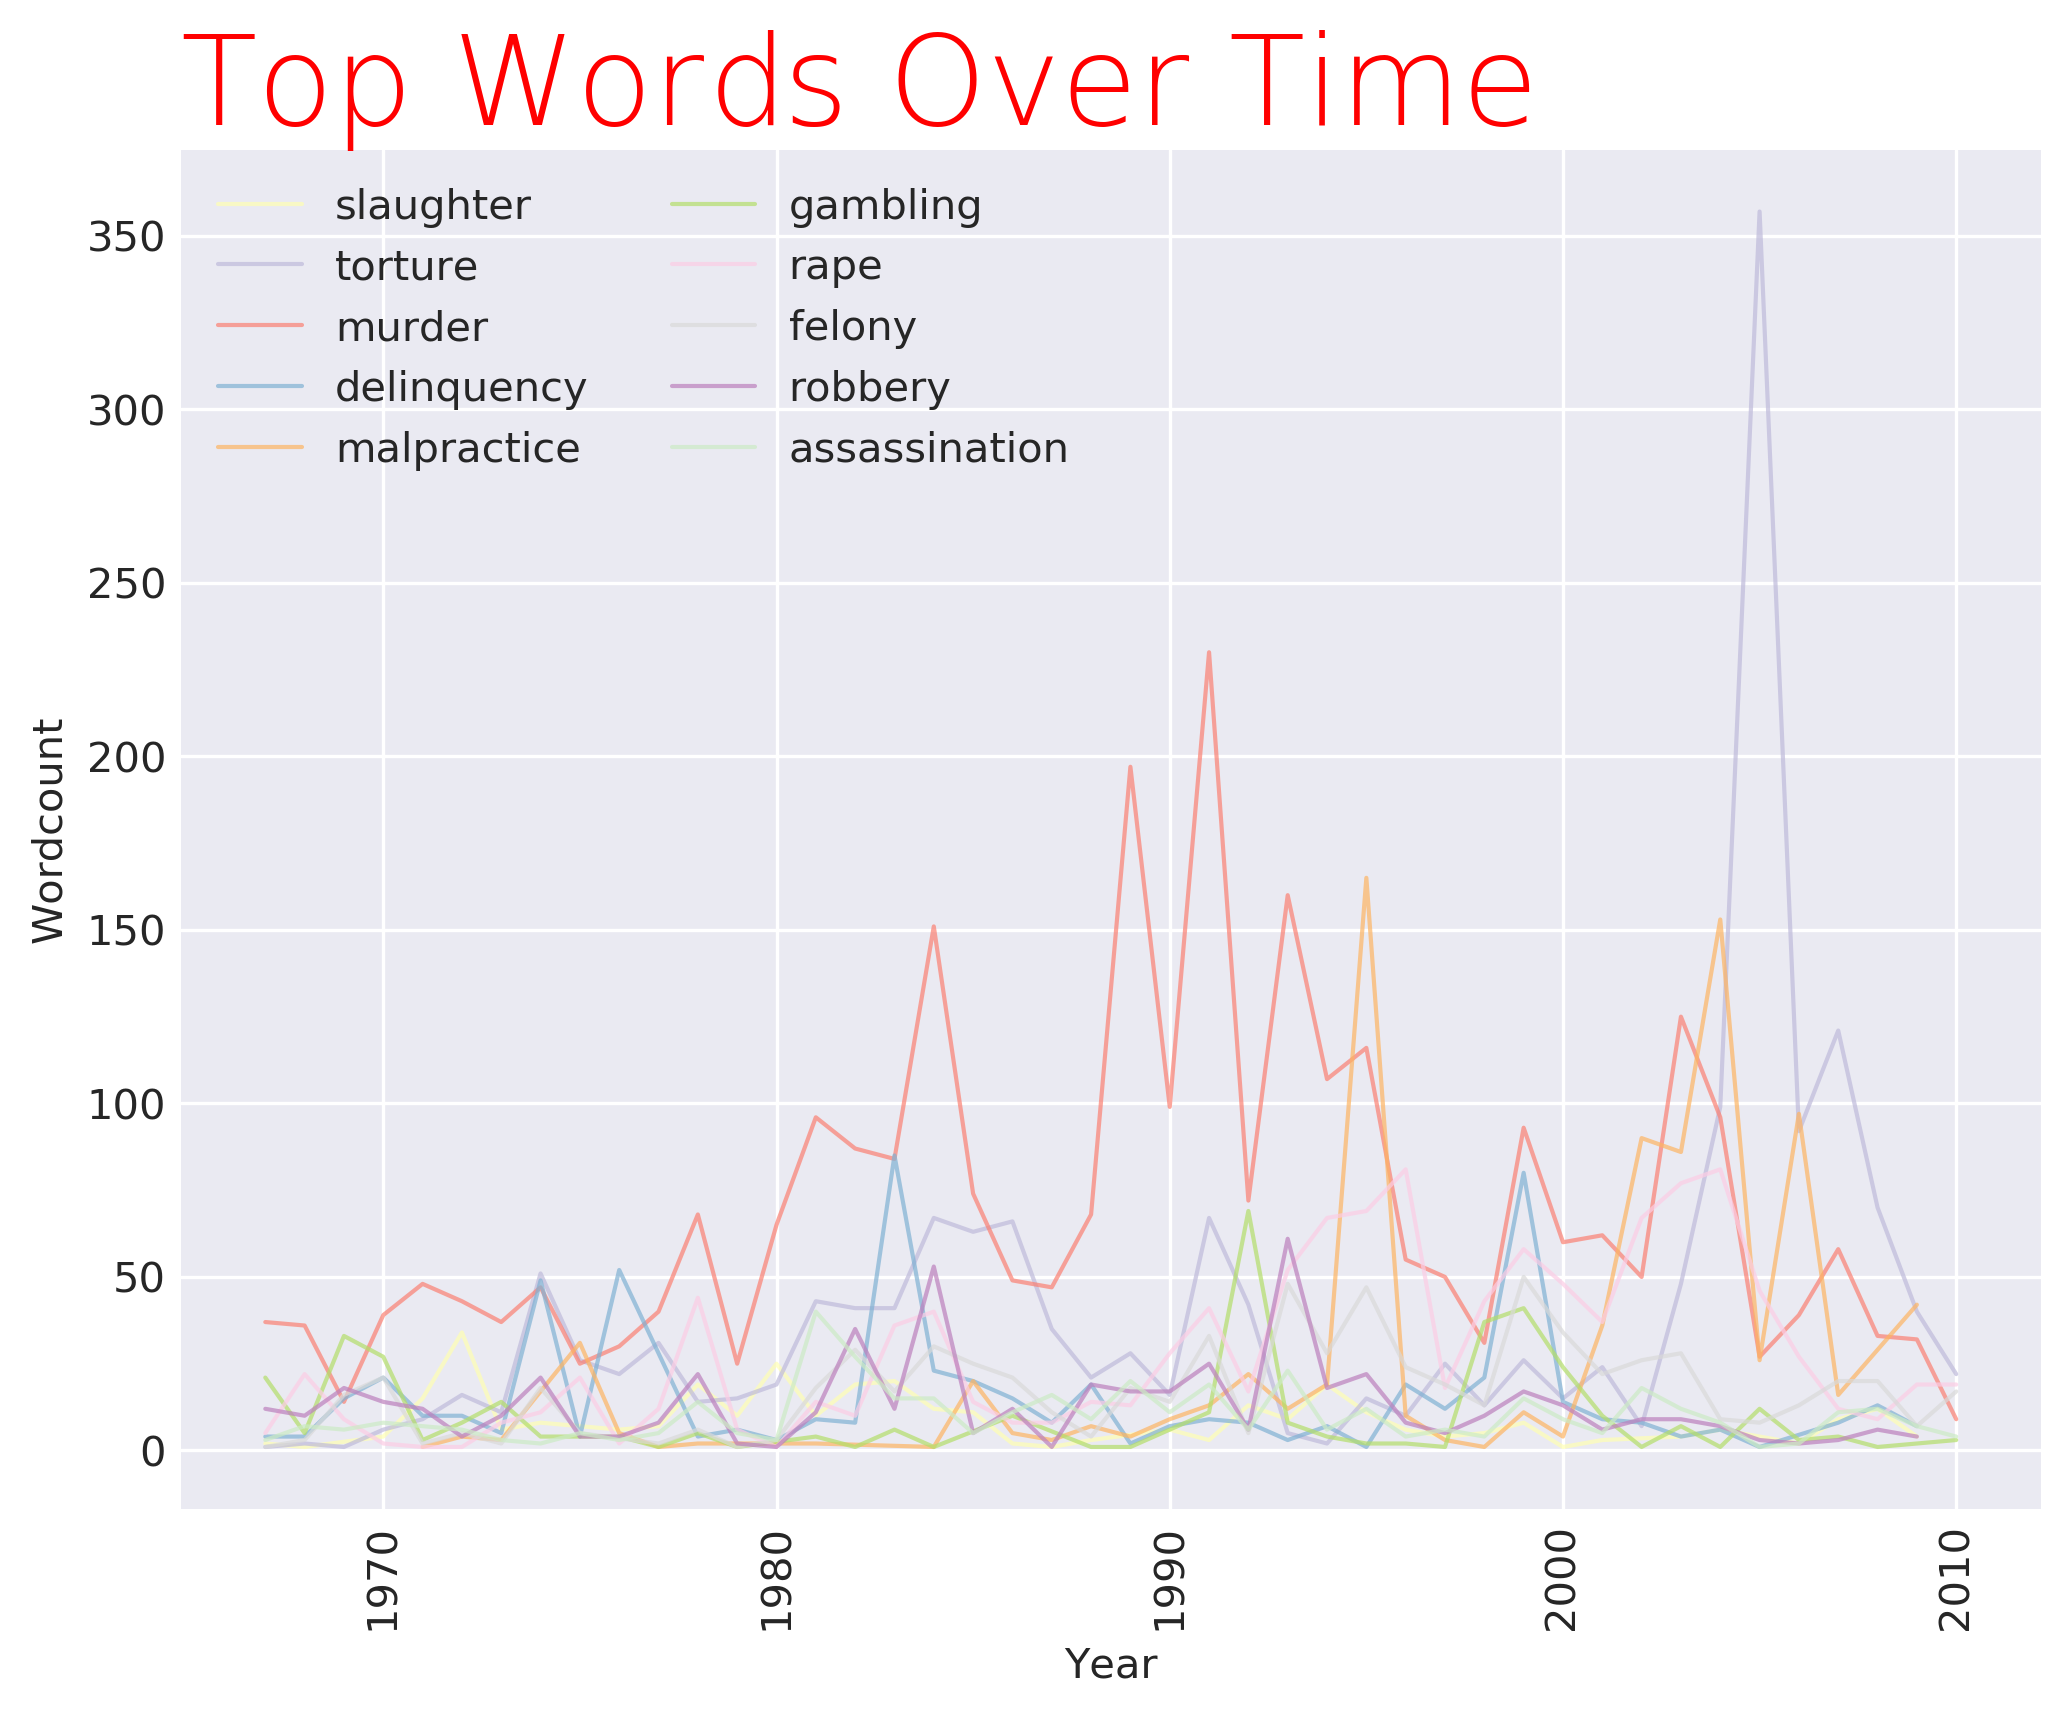

In [97]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

figure(figsize=(8, 6), dpi=300)

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('Set3') # this tells matplotlib what colors to use.  you can play with this to change the colors.
 
# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(topvocabperyear['vocab']):
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(topvocabperyear.loc[topvocabperyear['vocab'] == word, 'year'], # x axis 
             topvocabperyear.loc[topvocabperyear['vocab'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Over Time", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")

plt.show()



#### Digression on date formats

In the code above, we've used 'year' as our only date.  If we wanted to plot information by month, we'd need to do some reformatting.

Matplotlib likes data in the format y-m-d or d-m-y, not month_year. 

Fortunately, the datetime package can hep us to regularize the dates.

Here's the formula for date formatting to make Matplotlib happy.

    # convert month-year back to date format for easier plotting
    congress['month_year'] =congress.month_year.values.astype('datetime64[M]')

# Get proportions

Let's quickly think about measuring the proportions of each word over time.  


Because we tinkered with the original dataframe 'congress' so much, let's reload the data.

In [98]:
congress2 = pd.read_csv("congress1967-2010.csv")

KeyboardInterrupt: 

Handily, the Congress dataframe already has a 'word_count' column that we can use as the basis for our overall counts.  We will .sum() up the totals.

#### Count how many words were spoken overall per year.

To measure the proportions, rather than the word count, we need to know how many times each word was spoken overall in Congress each year.

We will use 

    .groupby()
    .sum()

In [ ]:
word_per_year_counts = congress2.groupby(['year']).sum().copy() 
word_per_year_counts[:5]

Let's do some minor reformatting.  We really only want the totals for 'word_count' per year.

In [ ]:
word_per_year_counts = word_per_year_counts[['word_count']].copy()
word_per_year_counts[:5]

We want the index column 'year' to be a normal column, so let's use

    .reset_index()

In [ ]:
word_per_year_counts.reset_index(level=0, inplace=True)
word_per_year_counts[:5]

What was the maximum number of words spoken in Congress in any given year?

In [ ]:
lotsofwords = max(word_per_year_counts['word_count'])
lotsofwords

What year was that in?  Let's use square brackets to grabe just the row.

In [ ]:
word_per_year_counts[word_per_year_counts['word_count']==lotsofwords]

#### Count words per month

To count words per month we'd use this:

    congress.groupby(['month_year']).sum()

In [ ]:
words_per_month_counts = congress.groupby(['month_year']).sum()
words_per_month_counts

Notice that the only results that are valid here are the totals in the 'word_count' column, which are accurate for grouping all speeches for each month_year period and adding together the word_counts of every relevant speeches.  There are other columns in the data frame that don't make any sense.  Unnamed: 0 is just the total of rnadom index numbers assigned by the computer.  The 'year' totals are the total of each year of each speech added together.  The 'month' column is the total of each month number (7 for July) added together.  *Keep in mind: you are responsible for knowing whether your data makes sense and only using the correct parts.*

Because we only care about the 'month_year' and the 'word_count' columns, let's reformat the data. 

In [ ]:
words_per_month_counts = words_per_month_counts[['word_count']].copy() # drop everything except the index and word_count column
words_per_month_counts.reset_index(level=0, inplace=True) # turn the index into a column 
words_per_month_counts

Let's use to_datetime() and .dt.year to make a 'year' column

In [102]:
words_per_month_counts['year'] = pd.to_datetime(words_per_month_counts['month_year']).dt.year # now we can make a column for just the year 
words_per_month_counts

,month_year,word_count,year
0,1967-01-01,38785,1967
1,1967-02-01,36447,1967
2,1967-03-01,50547,1967
3,1967-04-01,44599,1967
4,1967-05-01,49384,1967
...,...,...,...
489,2010-07-01,36463,2010
490,2010-08-01,28087,2010
491,2010-09-01,50322,2010
492,2010-11-01,22031,2010


#### Quick Diversion: Graphing Wordcount Over Time

Let's represent change over time by graphing the counts over months. 

Sometimes it's useful when working with dates to create an 'index' for the dataframe, which in this case will be used by matplotlib to decide which dates will be labeled.

In [103]:
import matplotlib.pyplot as plt

%matplotlib inline

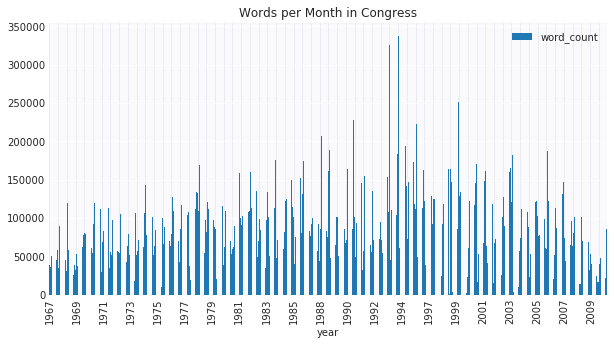

In [104]:
plt.rcParams['figure.figsize'] = [10, 5] # make the vis larger so it's easier to see 

a = words_per_month_counts.plot.bar(x = "year", y = "word_count", title = "Words per Month in Congress") # assign columns from the panda's DataFrame to the X and Y axis. 

# the following code makes all tick labels invisible, and then makes visible
# every 12th (since there are 12 months in a year)
plt.setp(a.get_xticklabels()[::1], visible=False)
plt.setp(a.get_xticklabels()[::24], visible=True)

a

In the representation of counts per month we can see that there's a lot of variation of how much Congress spoke and when.   Notice that there's a huge amount of variation -- from almost nothing to quite a lot.  These variations can create trouble for us if we aren't careful!

Notice above that we have told matplotlib to plot 'year', but all of the count information in the column 'word_count' is about how many words are spoken per month.  

Putting 'year' as the x variable for plot.bar means that the x-axis is nicely labeled with years. 

#### Plot Wordcounts per Year in Congress

We don't have the data in words_per_month_counts to count how many words are spoken each year. However, we created that data and stored it earlier in *word_per_year_counts.*

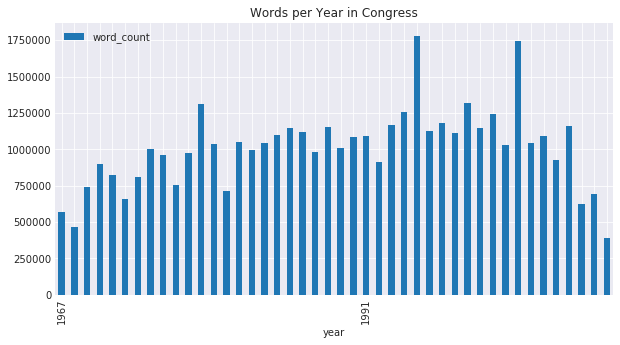

In [105]:

plt.rcParams['figure.figsize'] = [10, 5] # make the vis larger so it's easier to see 

# NOTICE THAT WE'RE CALLING A DIFFERENT DATASET IN THE LINE BELOW -- word_per_year_counts, not words_per_month_counts
a = word_per_year_counts.plot.bar(x = "year", y = "word_count", 
                                  title = "Words per Year in Congress") # Notice that I've changed the title to match the data.
plt.setp(a.get_xticklabels()[::1], visible=False)
plt.setp(a.get_xticklabels()[::24], visible=True)
a

## Calculate Proportion = count of the vocabulary words / count of all words

To calculate the proportions of our controlled vocab, we need to divide the count of vocab words over the count of all words:

    count of the vocabulary words / count of all words

The problem is that our vocab counts live in one dataframe -- topvocabperyear -- where our overall word counts for congress life in another dataframe -- word_per_year_counts.

We need to 'merge' two dataframes so that we have information about each year in the same dataframe as the per-year count of our top vocab words.   We'll use the function

    pd.merge(a, b)

-- which takes two objects, a and b, each of which are a dataframe.
    

The technical word for the kind of 'merge' we will perform is an "inner join."  Notice this command:

    how = 'inner'

You can picture an inner join like the area at the center of a venn diagram: in this case, both dataframes share the column month_year.  So we can tell python to paste them together using month_year.

We also tell pd.merge() which columns to use

    left_on='year'
    right_on='year'

In [106]:
top_vocab_w_per_year = pd.merge(topvocabperyear, word_per_year_counts,how='inner', left_on='year', right_on='year')

top_vocab_w_per_year.head()

,year,vocab,count,word_count
0,1967,assassination,3,568406
1,1967,delinquency,4,568406
2,1967,felony,1,568406
3,1967,gambling,21,568406
4,1967,murder,37,568406


Now that we have the count of each word ("count") in the same dataframe as the count of all words per month_year ("word_count"), we can find out what proportion of speech per month_year is represented by each word.

In [107]:
top_vocab_w_per_year['proportion'] = top_vocab_w_per_year['count']/top_vocab_w_per_year['word_count']
top_vocab_w_per_year[:10]

,year,vocab,count,word_count,proportion
0,1967,assassination,3,568406,0.000005
1,1967,delinquency,4,568406,0.000007
2,1967,felony,1,568406,0.000002
3,1967,gambling,21,568406,0.000037
4,1967,murder,37,568406,0.000065
5,1967,rape,5,568406,0.000009
6,1967,robbery,12,568406,0.000021
7,1967,slaughter,2,568406,0.000004
8,1967,torture,1,568406,0.000002
9,1968,assassination,7,466775,0.000015


Notice that the numbers in the "proportion" column are really small.  They represent proportions.

Remember what a proportion is: it's a cut of the pie.  If we had all the counts for every word in the dataset, those proportions would add up to 1.  

We can represent proportions as percentages: if the word "murder" has the proportion .0314, that means that 'murder' is appears 3.14% of the time.  

Knowing what the proportion means and talking about it accurately is an important part of doing data science correctly.  
Understanding proportion also means that we will take steps to make sure that any graph based on proportions represents those measures as percentages and labels them correctly.

## Line chart with proportions

There are only a few ways that the proportion chart differs from the raw count chart.  Can you find them all?

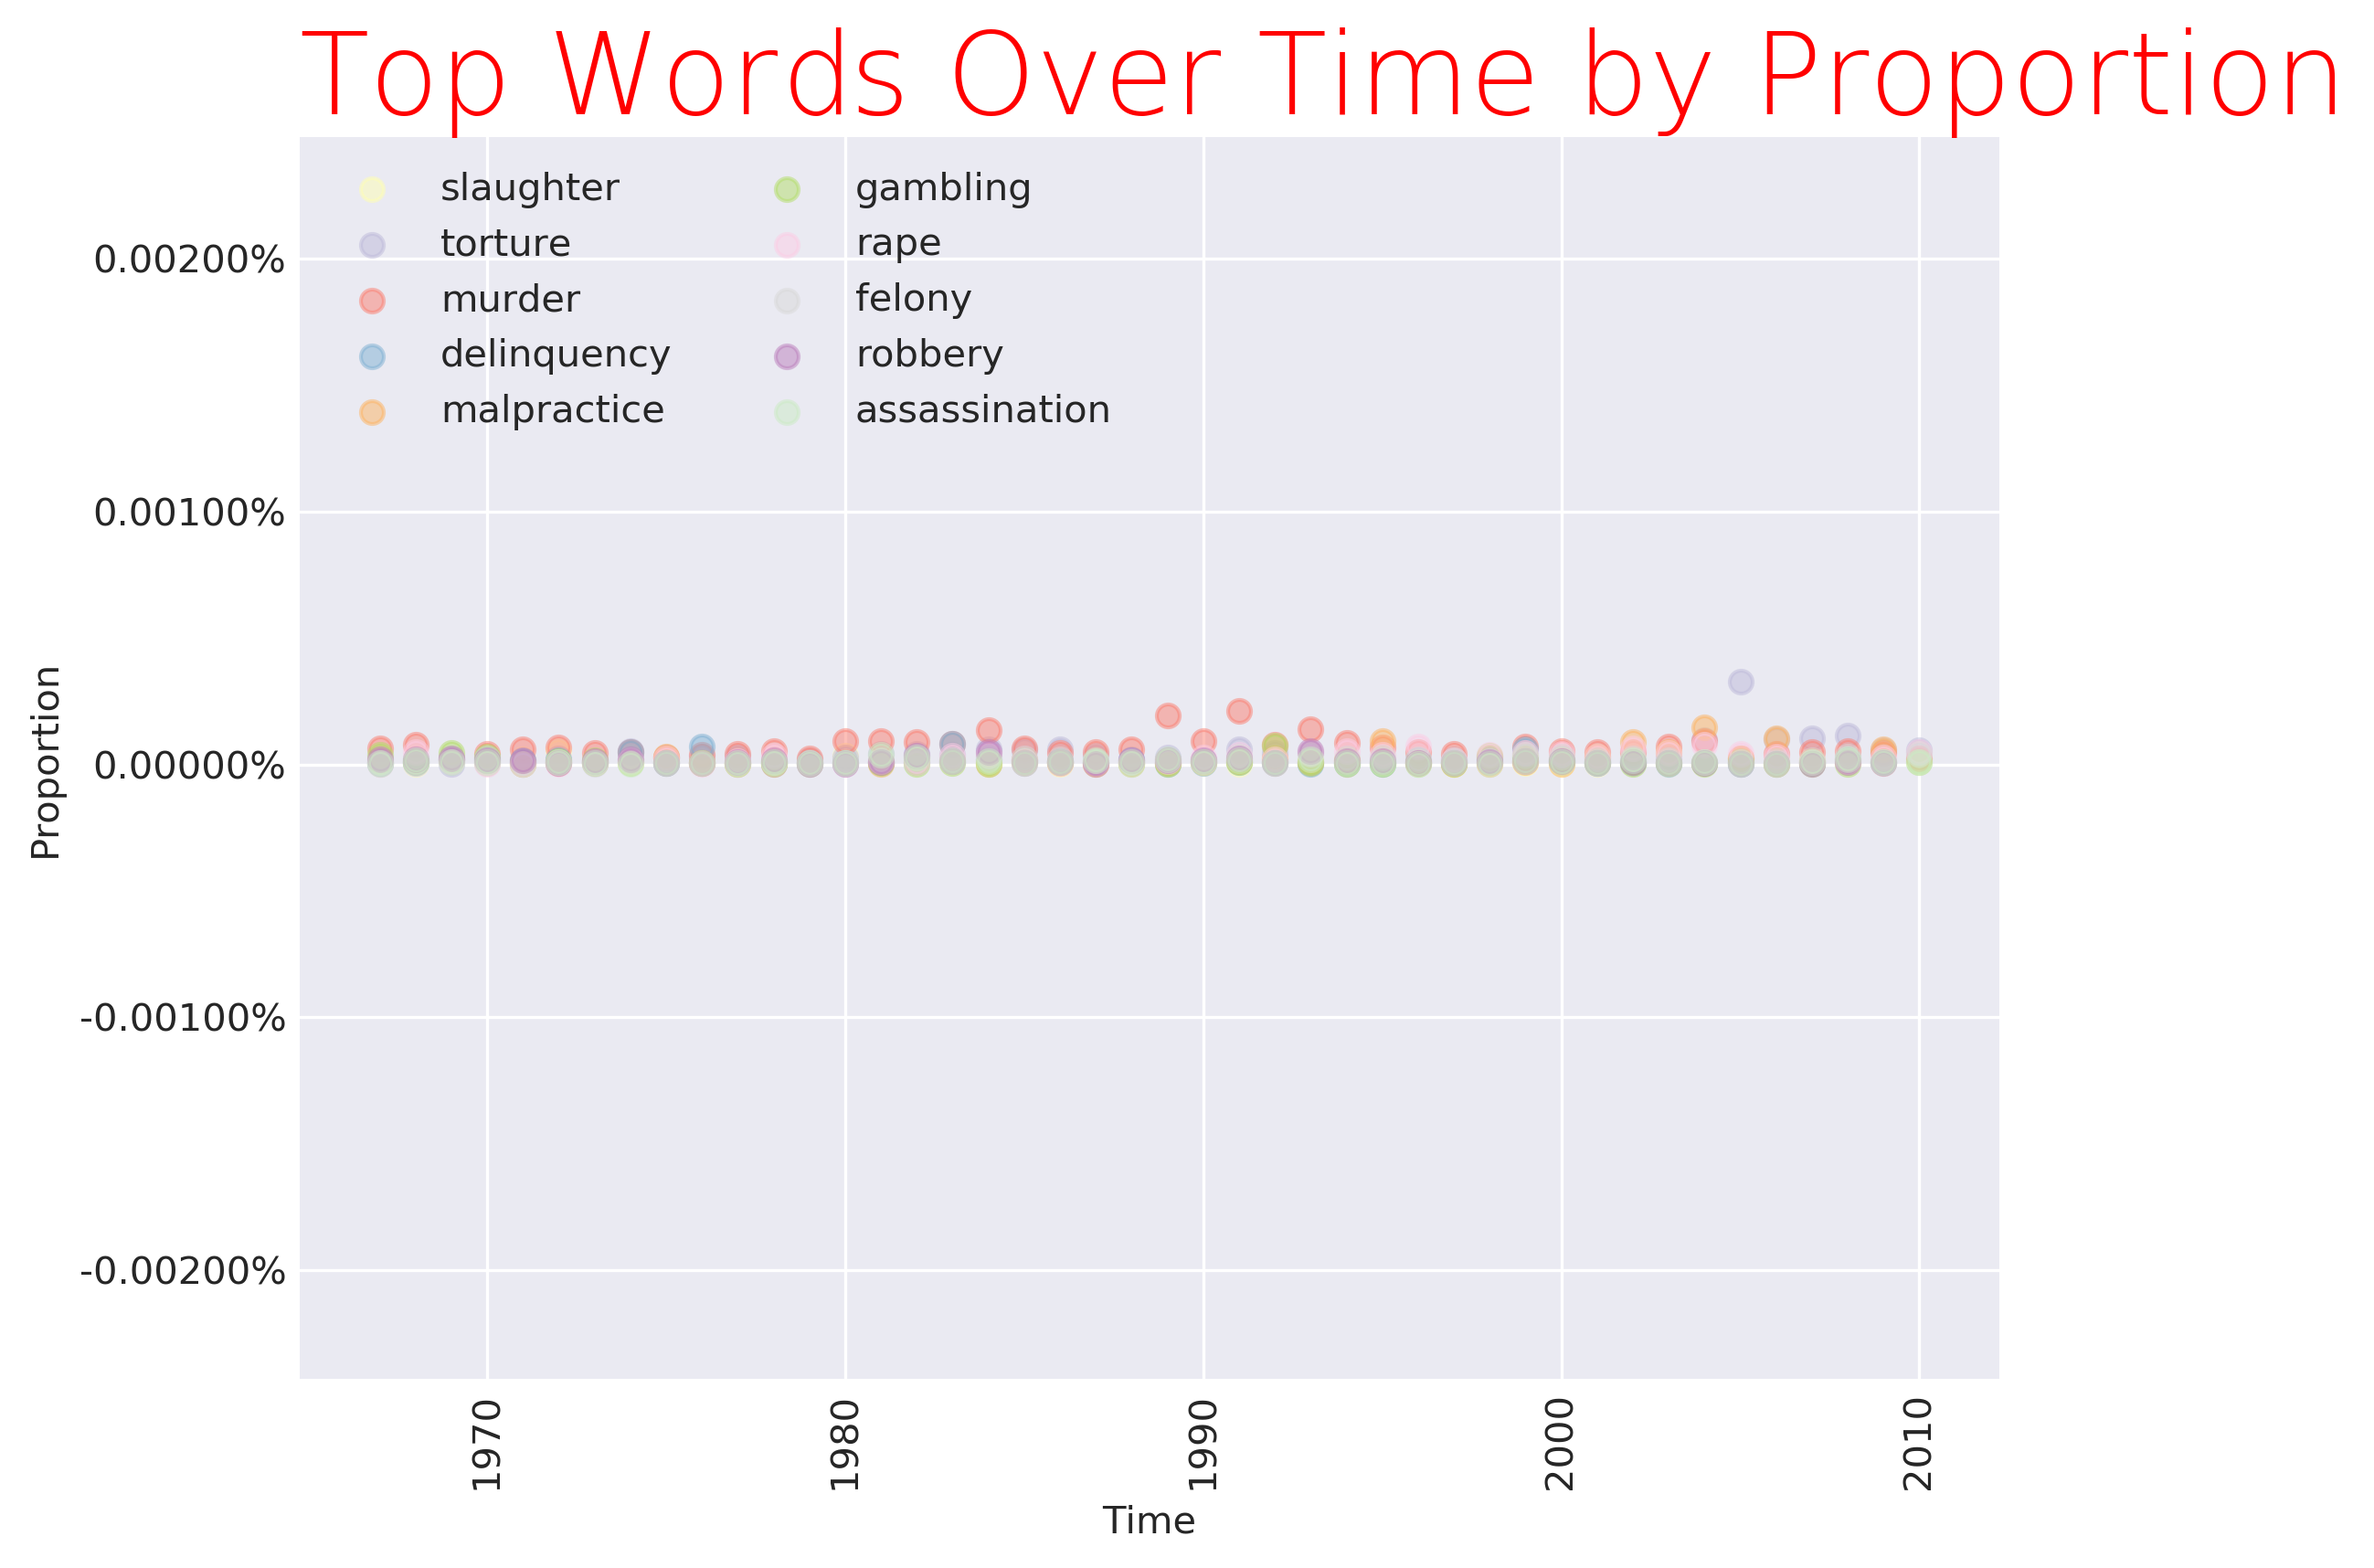

In [110]:
plt.clf() # <-- clears out the earlier plot

%matplotlib inline
import matplotlib.ticker as ticker # <--- notice that we're importing a new ticker function 

figure(figsize=(8, 6), dpi=300)
 
# create a color palette
palette = plt.get_cmap('Set3')
 
# multiple line plot
num=0


for word in set(top_vocab_w_per_year['vocab']):
    num+=1
    plt.scatter(top_vocab_w_per_year.loc[top_vocab_w_per_year['vocab'] == word, 'year'], # x axis 
             top_vocab_w_per_year.loc[top_vocab_w_per_year['vocab'] == word, 'proportion'],  # y axis
             color=palette(num), linewidth=1, alpha=0.5, label=word)

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Over Time by Proportion", loc='left', fontsize=30, fontweight=0, color='red')
plt.xlabel("Time")
plt.ylabel("Proportion") # <--- Notice that I've re-labeled the title and y-axis
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter()) # <--- This tells matplotlib that we're dealing with percentages
#plt.tick_params(axis='both',labelsize=14)

plt.show()


#### Dots not Lines?

Notice that this time I made a "dot plot", or "scatter plot", by switching out  plt.scatter() for plt.plot().  Which one is easier to read?  
*Edit the code above back to switch the visualization to a line chart.*

It will be your responsibility moving forward to choose the kind of dataviz that most cleanly and easily conveys informatino about your data.

Matplotlib has lots of different visualization styles to choose from. You can learn more by consulting a tutorial:
    
    https://github.com/rougier/matplotlib-tutorial

#### How are Proportions different than Counts?

How do the results of analyzing count and proportion compare? Sometimes taking the proportion can make a big difference.  

For instance, if Congress simply met more frequently in particular years, that might produce an artificial burst of the count of 'murder,' even though the proportion of 'murder' was actually smaller.

It's important for data analysts to know what they are looking at and to use proportion intelligently to correct for artificial distortions in word count.

## Summing up

Here is a chunk of code for preparing the software packages, data, controlled vocabulary, and stopwords. 

***Please remember that loading data takes a few minutes. Be patient. If you're running this after having run the previous blocks in the notebook, you can skip this section. ***

In [2]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


***Give this several minutes; we're reading in big data:***

In [3]:
congress = pd.read_csv("congress1967-2010.csv")
#congress = pd.read_csv("eighties_data.csv")

In [4]:
cd ~/digital-history

/users/jguldi/digital-history


In [5]:
vocab = pd.read_csv("crime_vocab.csv").drop(['Unnamed: 0'], 1)
vocab = list(vocab['word'])

In [8]:
import datetime
import pandas as pd
import numpy as np
import csv
import glob
import re
import nltk
from nltk.corpus import wordnet as wn
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker 

# Load data
ambiguouswords = ['infringement', 'setup', 'mischief', 'foul', 'illusion','encroachment', 'misdemeanor','unfairness', 'pretense','sophistication', 'deceit', 'play', 'tribute', 'liberty', 'protection',
                  'disservice','fabrication', 'equivocation','falsehood','usurpation','violation', 'injury', 'injustice', 'carnage', 'betrayal','evil', 'attempt',
                  'hell', 'offense','deviation', 'impropriety','indirection','pretending','duplicity', 'delusion','trickery','shrinkage','transgression',
                  'spoiling', 'indecency','depravity','sin','slay','butchery','molestation','mortal sin','guile','abomination','malicious mischief',
                  'treason','treachery','inroad','offence','foul play','perpetration','wile','iniquity','committal','brutalization','infliction','falsify','hooliganism','impersonation',
                    'sinning','fakery', 'hustle', 'mangle','intemperance', 'foul ball','fratricide','monkey business','terrorization','pilferage','gyp','off',
                  'pyramiding','obscenity','holdup', 'wickedness','nonfeasance','abnormality','law breaking','mutilate','caper','ill turn','frame up',
                  'prevarication','thuggery','immorality','perversion','rascality','quackery','double dealing','con','fraud','shenanigan','roguery','high treason',
                  'cheating','off','setup,' 'foul', 'wrong', 'liberty', 'attempt', 'liquidation', 'petty', 'battery', 'gaming', 'intrusion','raid','misfeasance',
                  'attack','assault','sting','indiscretion','vice','crime','snatch','infraction','misapplication','kill','irregularity','flimflam','chicanery',
                  'sellout','twisting','blaze','straining','misbehavior','warp','spoilage','tort','simulation','turpitude','dereliction','mayhem', 'dishonesty',
                  'cheat', 'trick','deception','skimming', 'distort','bluff', 'distortion', 'misrepresentation','execute','gore', 'job', 'technical',
                  'damage', 'elimination', 'take in', 'burke', 'remove', 'fall', 'familiarity', 'pretence', 'maintenance', 'spoil', 'commission', 
                  'protection', 'execution', 'tribute', 'hit', 'dispatch', 'play', 'rolling']

# Filter for just the top speakers about crime
crimespeakers = ['Mr. BIDEN', 'Mr. HATCH', 'Mr. LEAHY', 'Mr. KENNEDY', 'Mr. PROXMIRE',
       'Mr. THURMOND', 'Mr. SPECTER', 'Mr. SMITH', 'Mrs. FEINSTEIN',
       'Mr. McCLELLAN']
congress = congress[congress['speaker'].isin(crimespeakers)]

Here is a chunk of code for cleaning the text.

***Please note that the line .apply(lemmatizetext) is time consuming.  This code may take some time to run. If you're running this after having run the previous blocks in the notebook, you can skip this section. ******

In [9]:
###### Cleaning
congress['speech'] = congress['speech'].str.replace('[^\w\s]','') # strip punctuation
congress['speech'] = congress['speech'].str.lower() # lowercase
congress['speech'] = congress['speech'].str.split() # split into words
congress = congress.drop(['date', 'month', "Unnamed: 0"], 1) # drop unused columns 
congress['lemmas'] = [[wn.morphy(word) for word in row] for row in congress['speech']] # lemmatize each word in each row of the column 'lemmas'
congress['lemmas'] = [[word for word in row if word is not None] for row in congress['speech']] # if no lemma found, skip it.
congress['lemmas'] = [' '.join(row) for row in congress['lemmas']] # glue the individual list of lemmas back into one string per speech

Here is the code for counting words and vocabulary by month and by year.

***If you're running this after having run the previous blocks in the notebook, start here to make all the relevant counts***

In [16]:
###############################
##### Baseline Counts
# count overall words (not vocab) per year
word_per_year_counts = congress.groupby(['year']).sum().copy() 
word_per_year_counts = word_per_year_counts[['word_count']].copy()
word_per_year_counts.reset_index(level=0, inplace=True)

# counter overall words (not vocab) per month
words_per_month_counts = congress.groupby(['month_year']).sum()
words_per_month_counts = words_per_month_counts[['word_count']].copy() # drop everything except the index and word_count column
words_per_month_counts.reset_index(level=0, inplace=True) # turn the index into a column 

###############################
##### Detect controlled vocabulary
vocabpattern = r"(?=\b("+'|'.join(vocab)+r")\b)"  
congress["vocab"] = congress["lemmas"].str.findall(vocabpattern)

# Minor reformatting
vocabspeeches = congress.copy() # make a copy
vocabspeeches = vocabspeeches.drop(['speech', 'lemmas'], 1) # drop columns 
vocabspeeches = vocabspeeches.explode('vocab') # explode list of strings so that each word gets its own row


In [65]:
###############################
##### Baseline Counts
# count overall words (not vocab) per year
word_per_year_counts = congress.groupby(['year']).sum().copy() 
word_per_year_counts = word_per_year_counts[['word_count']].copy()
word_per_year_counts.reset_index(level=0, inplace=True)

# counter overall words (not vocab) per month
words_per_month_counts = congress.groupby(['month_year']).sum()
words_per_month_counts = words_per_month_counts[['word_count']].copy() # drop everything except the index and word_count column
words_per_month_counts.reset_index(level=0, inplace=True) # turn the index into a column 

###############################
##### Detect controlled vocabulary
vocabpattern = r"(?=\b("+'|'.join(vocab)+r")\b)"  
congress["vocab"] = congress["lemmas"].str.findall(vocabpattern)

# Minor reformatting
vocabspeeches = congress.copy() # make a copy
vocabspeeches = vocabspeeches.drop(['speech', 'lemmas'], 1) # drop columns 
vocabspeeches = vocabspeeches.explode('vocab') # explode list of strings so that each word gets its own row

# remove ambiguous vocabulary
vocabspeeches2 = vocabspeeches[vocabspeeches['vocab'].isin(ambiguouswords) == False] # keep only the words of vocabspeeches where the word in vocab is NOT in the list ambiguouswords
vocabspeeches = vocabspeeches[(vocabspeeches['vocab'].str.len() >= 1)] # drop rows with nothing in them (where the length of the list generated is less than one)

# Get the overall most frequent results
per_vocab_totals = vocabspeeches.groupby(['vocab'])['vocab'].count()
per_vocab_totals = per_vocab_totals.to_frame() # convert the resulting series to a dataframe
per_vocab_totals.columns = ['count'] # rename the column 'count'
per_vocab_totals = per_vocab_totals.reset_index() # reset the index so that 'vocab' has a column of its own.

###############################
####### Counting controlled vocabulary over time

# per year vocabulary counts

# grab just the relevant columns
relevant_columns = vocabspeeches[['year', 'vocab']]

# Count vocabulary per year
vocab_per_year = relevant_columns.groupby(['year', 'vocab'])['vocab'].count() 

# minor reformatting
vocab_per_year = pd.DataFrame(vocab_per_year) # convert from Series to DataFrame
vocab_per_year.columns = ['count'] # label the one column "count"
vocab_per_year = vocab_per_year.reset_index() # turn the multi-index into columns 'year' and 'vocab'

# Most frequent vocabulary per year
topvocab = per_vocab_totals.nlargest(20, ['count'])
topvocab = list(topvocab['vocab'])
topvocabperyear = vocab_per_year[vocab_per_year['vocab'].isin(topvocab)]

# get vocabulary proportions per year
top_vocab_w_per_year = pd.merge(topvocabperyear, word_per_year_counts,how='inner', left_on='year', right_on='year')
top_vocab_w_per_year['proportion'] = top_vocab_w_per_year['count']/top_vocab_w_per_year['word_count']



# per month vocabulary counts



# grab just the relevant columns
relevant_columns = vocabspeeches[['year', 'month_year', 'vocab']]

# Count vocabulary per month
vocab_per_month = relevant_columns.groupby(['year', 'month_year', 'vocab'])['vocab'].count() 
vocab_per_month.columns = ['vocab', 'year', 'month_year', 'count'] # Minor reformatting

# minor reformatting
vocab_per_month = pd.DataFrame(vocab_per_month) # convert from Series to DataFrame
vocab_per_month.columns = ['count'] # label the one column "count"
vocab_per_month = vocab_per_month.reset_index() # turn the multi-index into columns 'year', 'month-year' and 'vocab'

# Most frequent vocabulary per month
topvocab = vocab_per_month.nlargest(20, ['count'])
topvocab = list(topvocab['vocab'])
topvocabpermonth = vocab_per_month[vocab_per_month['vocab'].isin(topvocab)]

# get vocabulary proportions per month
top_vocab_w_per_month = pd.merge(topvocabpermonth, words_per_month_counts,how='inner', left_on='month_year', right_on='month_year')
top_vocab_w_per_month['proportion'] = top_vocab_w_per_month['count']/top_vocab_w_per_month['word_count']


Here is a chunk of code for inspecting what you just did.

In [66]:
###############################
####### Inspect the results

print("**********************")
print("Top Crime Vocabulary per Year by Raw Count")
print(topvocabperyear[:10])

print("**********************")
print("Top Crime Vocabulary per Month by Raw Count")
print(topvocabpermonth[:10])

print("**********************")
print("Top Crime Vocabulary per Year by Proportional Count")
print(top_vocab_w_per_year[:10])

print("**********************")
print("Top Crime Vocabulary per Month by Proportional Count")
print(top_vocab_w_per_month[:10])

**********************
Top Crime Vocabulary per Year by Raw Count
    year       vocab  count
3   1967     assault      9
4   1967      attack     59
5   1967     attempt     78
14  1967  commission    146
17  1967       crime    308
19  1967      damage     39
38  1967        fall     30
43  1967       fraud      8
52  1967      injury     14
56  1967         job    147
**********************
Top Crime Vocabulary per Month by Raw Count
    year  month_year       vocab  count
7   1967  1967-01-01  commission      4
8   1967  1967-01-01       crime     34
23  1967  1967-01-01         job      7
33  1967  1967-01-01  protection     12
49  1967  1967-02-01  commission     33
51  1967  1967-02-01       crime     76
64  1967  1967-02-01         job      5
74  1967  1967-02-01  protection     14
88  1967  1967-03-01  commission     13
89  1967  1967-03-01       crime     35
**********************
Top Crime Vocabulary per Year by Proportional Count
   year       vocab  count  word_count  prop

Here is a chunk of code for turning the results into graphs.

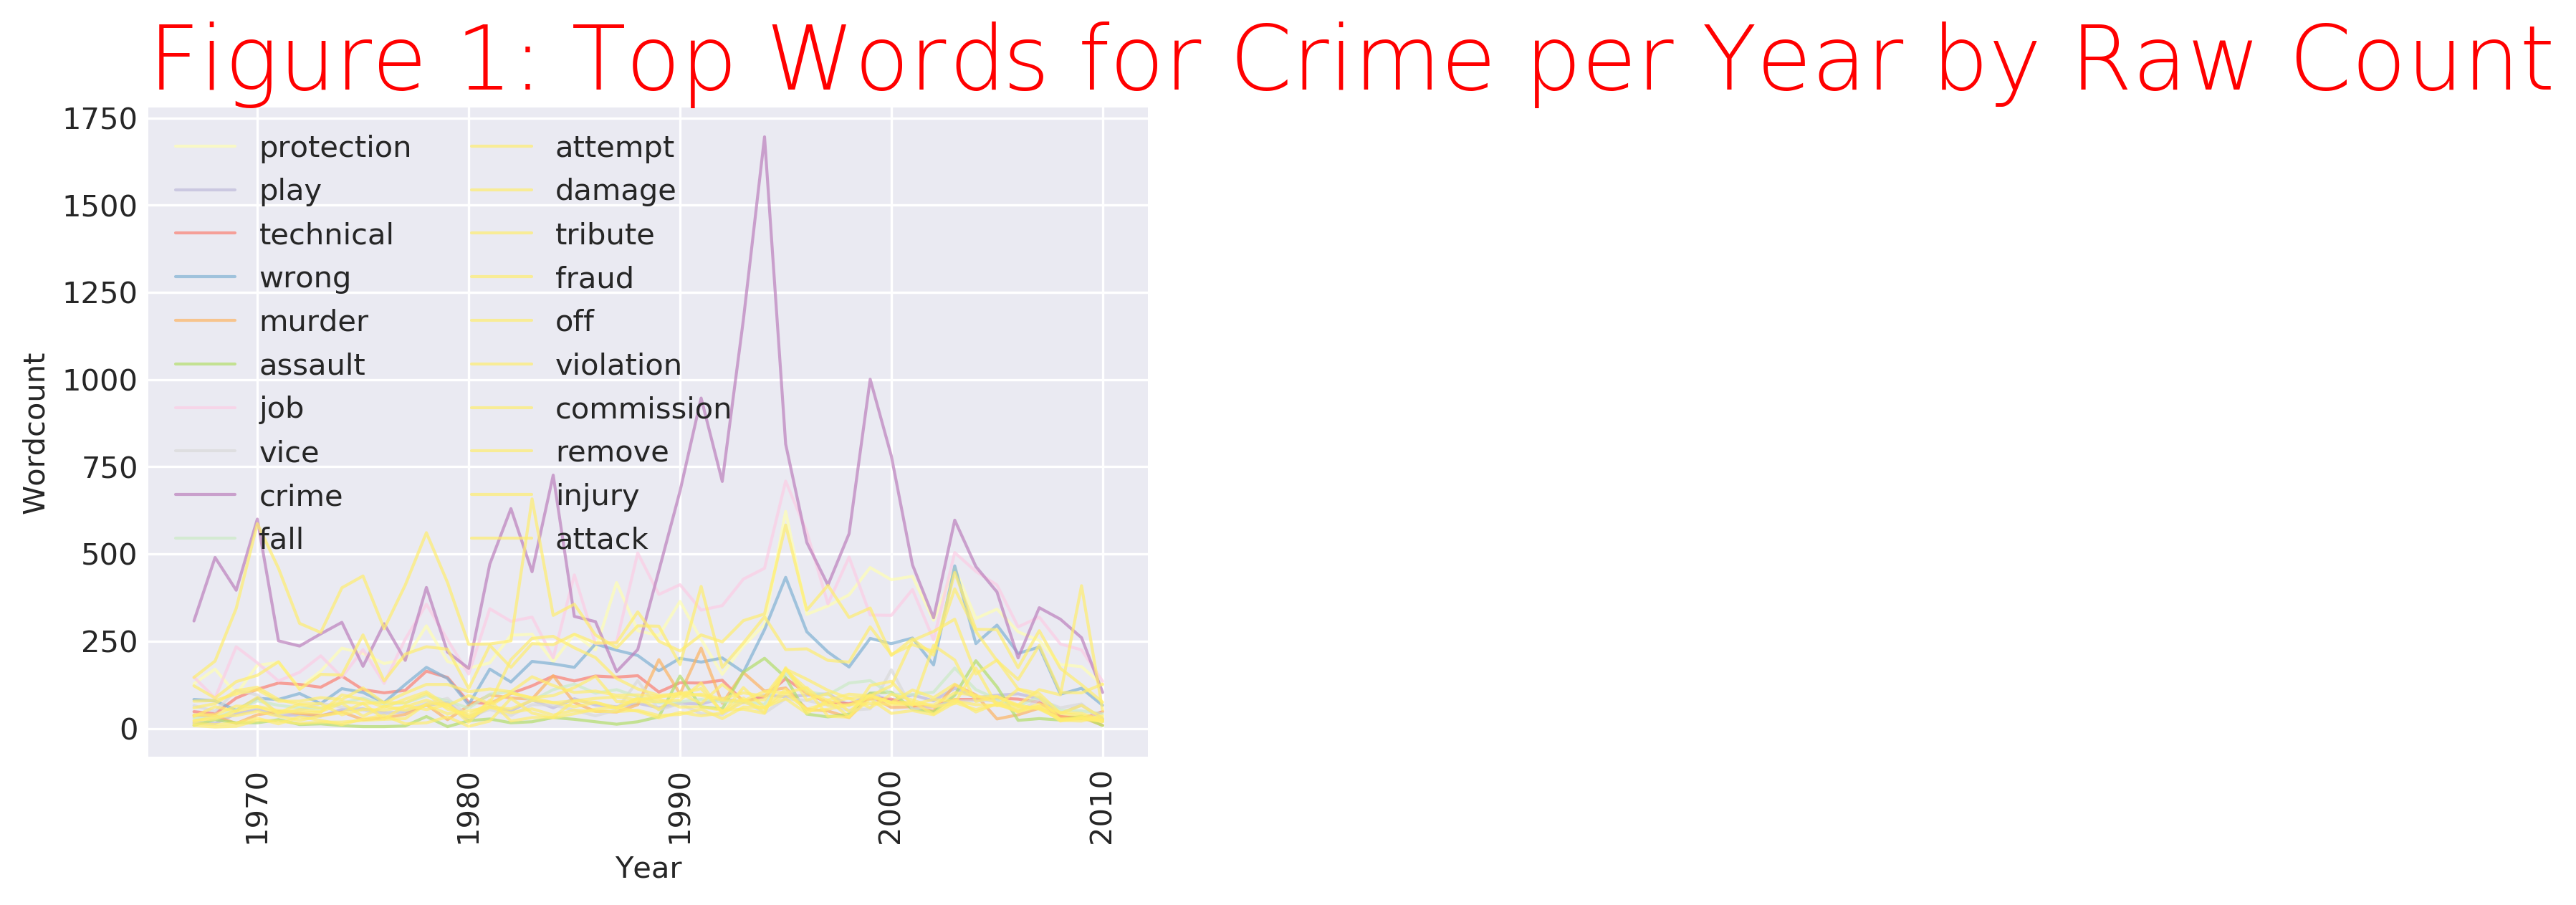

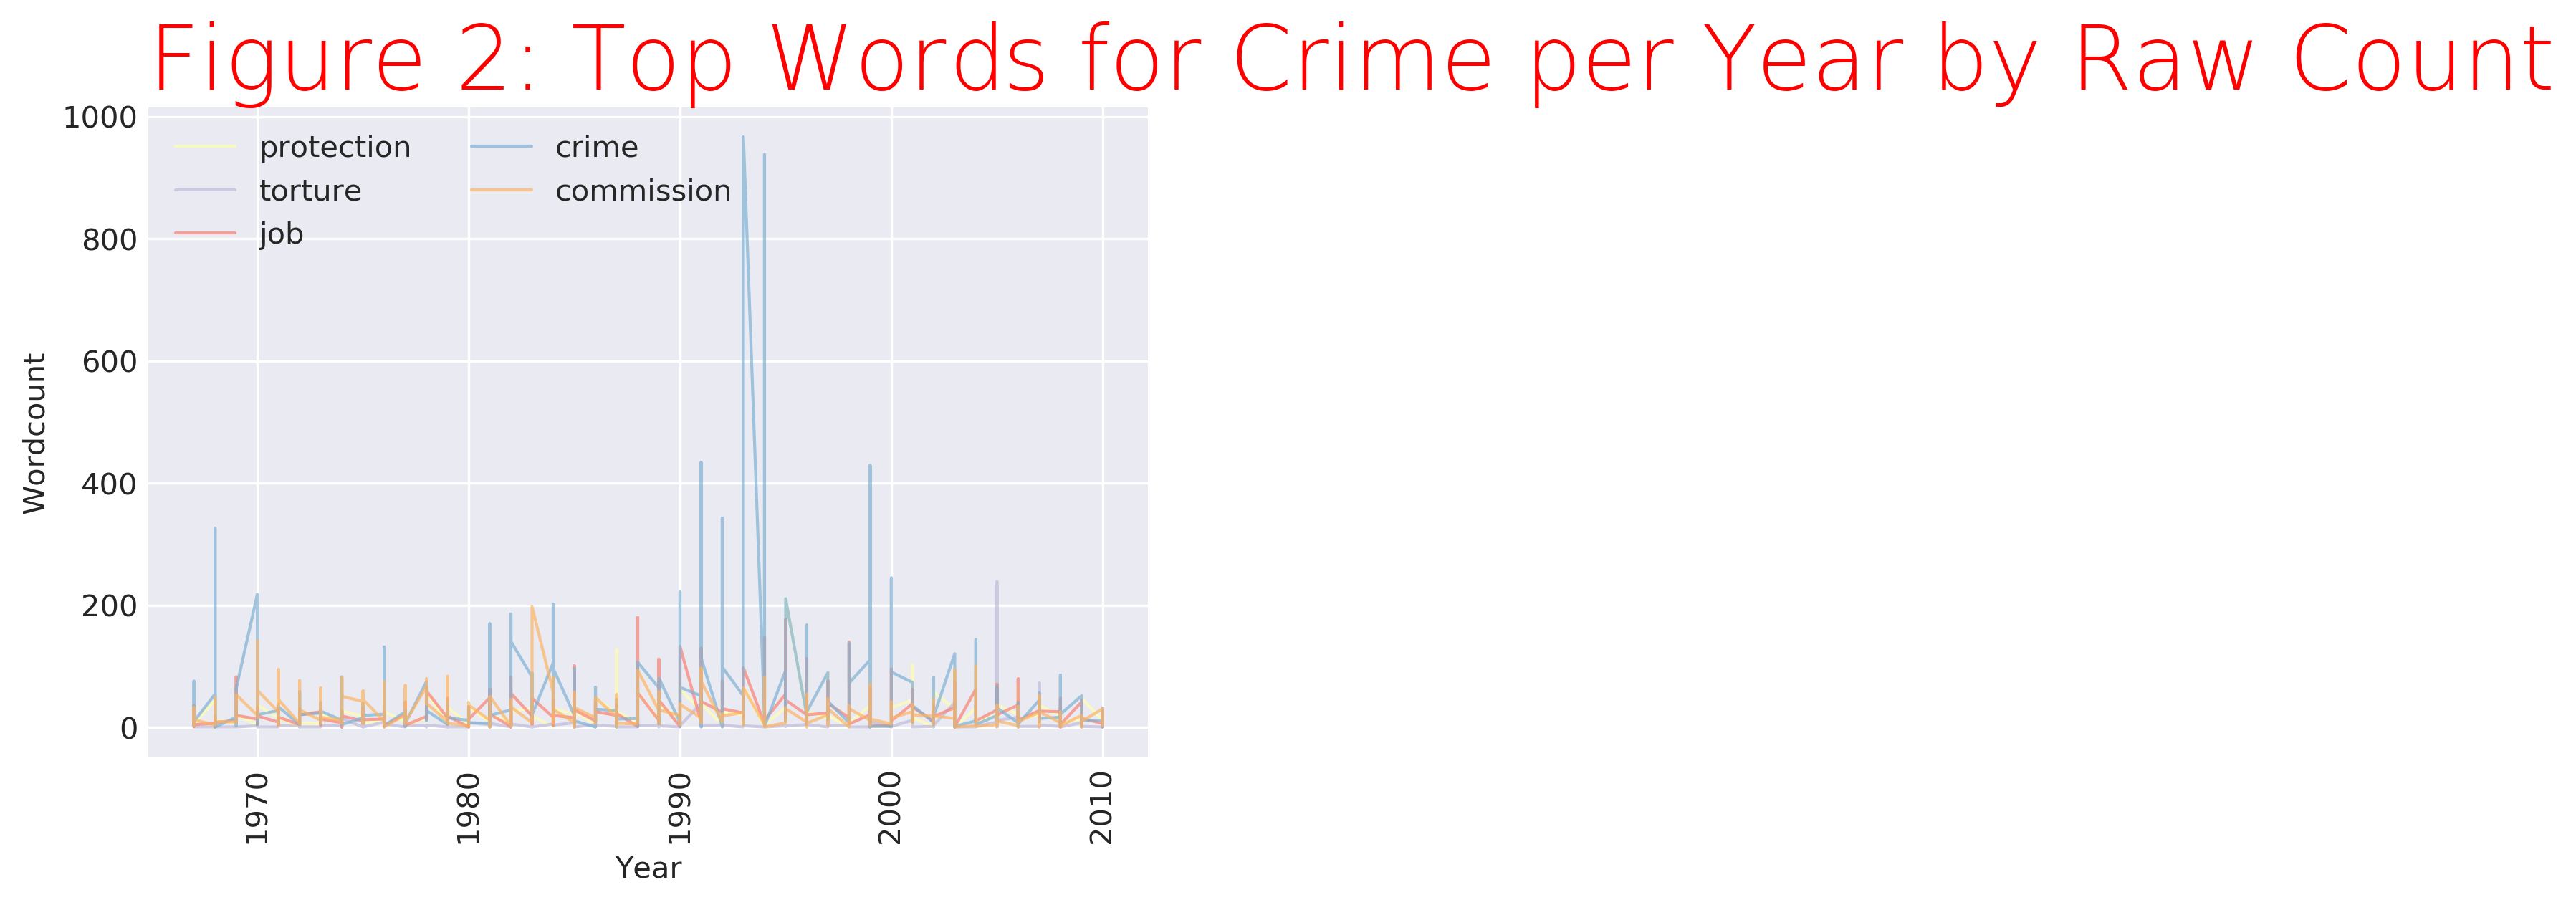

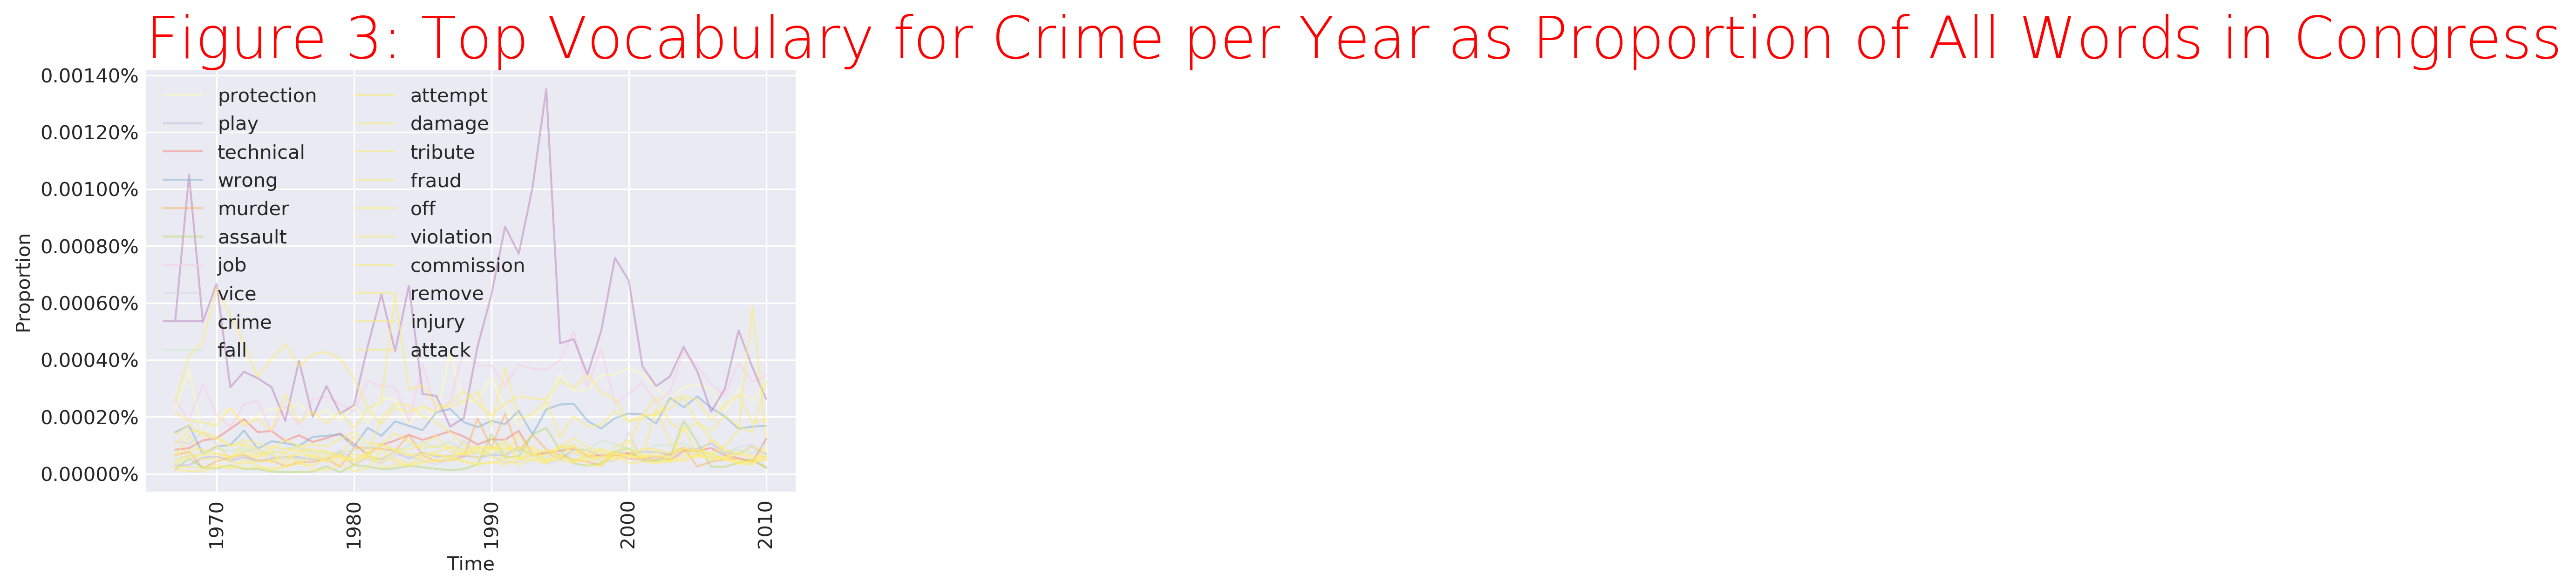

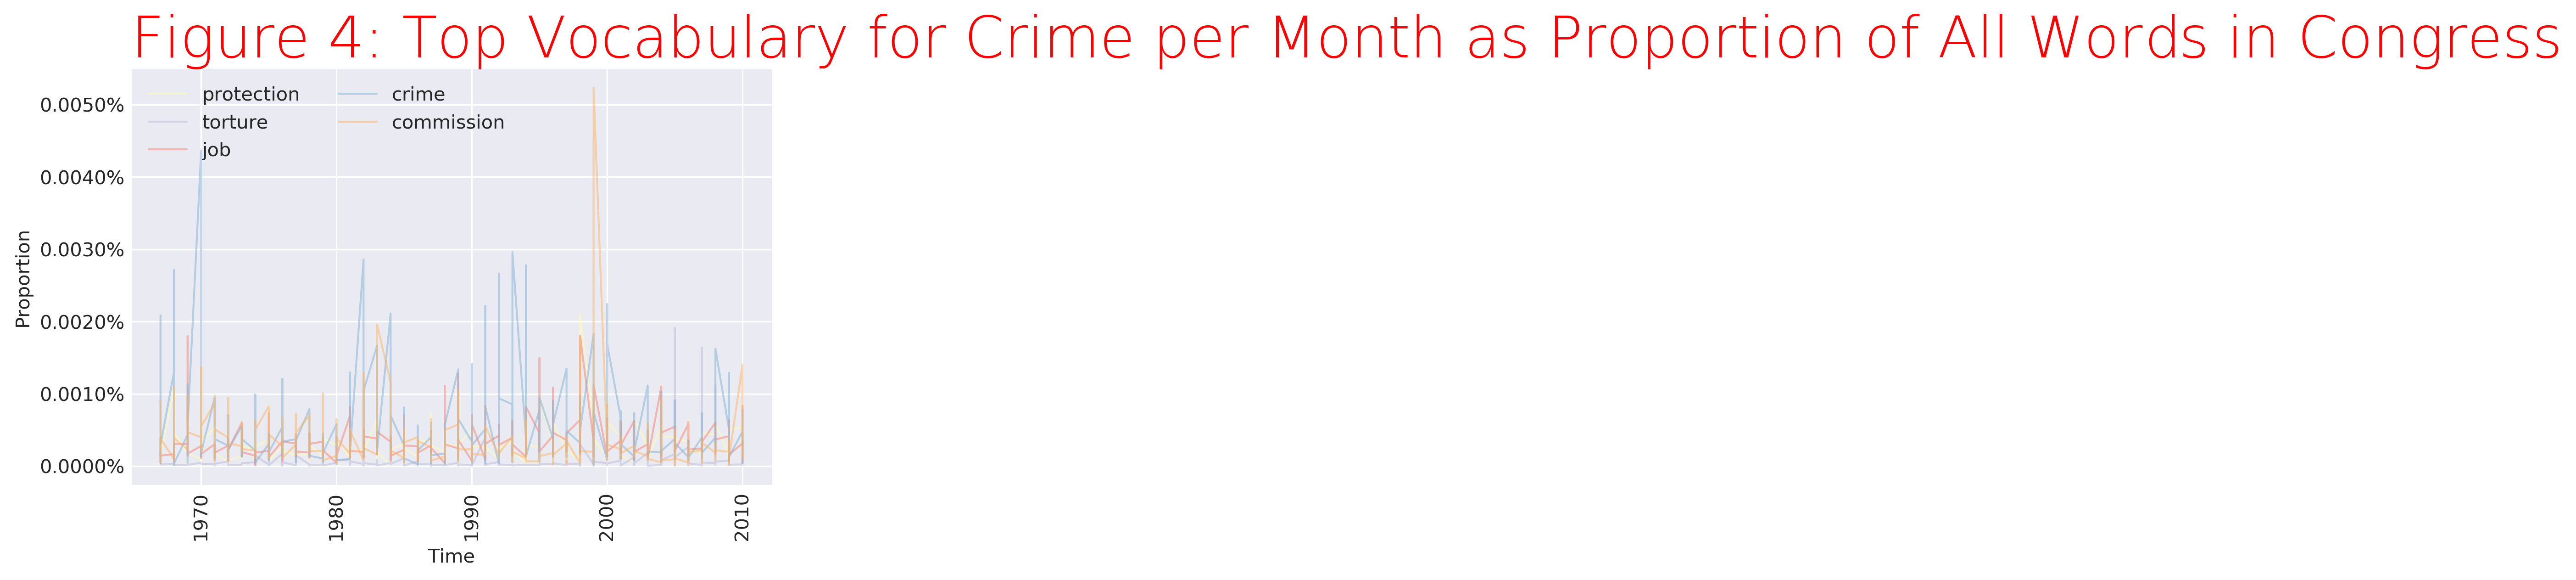

In [67]:
###############################
####### Visualize the results

# RAW vocab counts per year
%matplotlib inline
figure(figsize=(6, 4), dpi=300)
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('Set3') # this tells matplotlib what colors to use.  you can play with this to change the colors.
num=0
for word in set(topvocabperyear['vocab']):
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(topvocabperyear.loc[topvocabperyear['vocab'] == word, 'year'], # x axis 
             topvocabperyear.loc[topvocabperyear['vocab'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
plt.title("Figure 1: Top Words for Crime per Year by Raw Count", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")
plt.show()


# RAW vocab counts per month
%matplotlib inline
figure(figsize=(6, 4), dpi=300)
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
palette = plt.get_cmap('Set3') # this tells matplotlib what colors to use.  you can play with this to change the colors.
num=0
for word in set(topvocabpermonth['vocab']):
    num+=1 # for each new word, the counter 'num' changes 
    plt.plot(topvocabpermonth.loc[topvocabpermonth['vocab'] == word, 'year'], # x axis 
             topvocabpermonth.loc[topvocabpermonth['vocab'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
plt.title("Figure 2: Top Words for Crime per Month by Raw Count", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Year")
plt.ylabel("Wordcount")
plt.show()

###############################
# PROPORTIONAL vocab counts per year
plt.clf() # <-- clears out the earlier plot
%matplotlib inline
figure(figsize=(6, 4), dpi=300)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set3')
num=0
for word in set(top_vocab_w_per_year['vocab']):
    num+=1
    plt.plot(top_vocab_w_per_year.loc[top_vocab_w_per_year['vocab'] == word, 'year'], # x axis 
             top_vocab_w_per_year.loc[top_vocab_w_per_year['vocab'] == word, 'proportion'],  # y axis
             color=palette(num), linewidth=1, alpha=0.5, label=word)
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
plt.title("Figure 3: Top Vocabulary for Crime per Year as Proportion of All Words in Congress", loc='left', fontsize=30, fontweight=0, color='red')
plt.xlabel("Time")
plt.ylabel("Proportion") # <--- Notice that I've re-labeled the title and y-axis
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter()) # <--- This tells matplotlib that we're dealing with percentages
plt.show()


# PROPORTIONAL vocab counts per month
plt.clf() # <-- clears out the earlier plot
%matplotlib inline
figure(figsize=(6, 4), dpi=300)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set3')
num=0
for word in set(top_vocab_w_per_month['vocab']):
    num+=1
    plt.plot(top_vocab_w_per_month.loc[top_vocab_w_per_month['vocab'] == word, 'year'], # x axis 
             top_vocab_w_per_month.loc[top_vocab_w_per_month['vocab'] == word, 'proportion'],  # y axis
             color=palette(num), linewidth=1, alpha=0.5, label=word)
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
plt.title("Figure 4: Top Vocabulary for Crime per Month as Proportion of All Words in Congress", loc='left', fontsize=30, fontweight=0, color='red')
plt.xlabel("Time")
plt.ylabel("Proportion") # <--- Notice that I've re-labeled the title and y-axis
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter()) # <--- This tells matplotlib that we're dealing with percentages
plt.show()

## Assignment (working in groups)

* 1) Do you like the results of Figures 1-4? Are they meaningful?  

     * a) Do the apparent spikes in the raw count in Figures 1-2 still seem meaningful after you view them as proportions in Figures 3-4?  Do any of the spikes visible in the raw counts chart appear irrelevant or diminished in the proportions chart?  How do you interpret this difference?  *Which chart should you be writing about?*  
     
     * b) Compare Figures 3-4 with the scatterplot/dot-plot generated in the code above.  Do you prefer the lines or the dots in terms of legibility? Why?




* 2) Group by speaker and year and find out how many times each speaker used each of the top vocab words by raw count. Make a visualization.

* 3) Narrow to just *one* speaker.  Make a visualization of just the crime words per year for that one speaker. Use proportion, not raw count.  





***Part II (due next day)***

* 4) Cut and paste code from the wordnet package to find a new expanded vocabulary of words relating to some current event -- for instance, hurricanes, infrastructure, public health, education, or some related issue.  Cut and paste code from this assignment so that you have a neat series of lines of code that clean and lemmatize Congressional speeches, search them for a controlled vocabulary, perform counts and proportions, and graph the proportion counts.  Apply this to your new wordnet vocabulary.  

* 5) Recreate task #4 with data from your data challenge.

Upload five visualizations to Canvas.